In [35]:
student_name = "Laxmi Prasanna Akula"
student_id = "47999233"

### Analysis of an E-commerce Dataset

We have been provided with a combined e-commerce dataset. In this dataset, each user has the ability to post a rating and review for the products they purchased. Additionally, other users can evaluate the initial rating and review by expressing their trust or distrust.

This dataset includes a wealth of information for each user. Details such as their profile, ID, gender, city of birth, product ratings (on a scale of 1-5), reviews, and the prices of the products they purchased are all included. Moreover, for each product rating, we have information about the product name, ID, price, and category, the rating score, the timestamp of the rating and review, and the average helpfulness of the rating given by others (on a scale of 1-5).

The dataset is from several data sources, and we have merged all the data into a single CSV file named 'A Combined E-commerce Dataset.csv'. The structure of this dataset is represented in the header shown below.

| userId | gender | rating | review| item | category | helpfulness | timestamp | item_id | item_price | user_city|

    | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- |  ---- |  ---- |  
    
#### Description of Fields

* __userId__ - the user's id
* __gender__ - the user's gender
* __rating__ - the user's rating towards the item
* __review__ - the user's review towards the item
* __item__ - the item's name
* __category__ - the category of the item
* __helpfulness__ - the average helpfulness of this rating
* __timestamp__ - the timestamp when the rating is created
* __item_id__ - the item's id
* __item_price__ - the item's price
* __user_city__ - the city of user's birth

Note that, a user may rate multiple items and an item may receive ratings and reviews from multiple users. The "helpfulness" is an average value based on all the helpfulness values given by others.

There are four questions to explore with the data as shown below.



<img src="data-relation.png" align="left" width="400"/>


 #### Q1. Remove missing data
 
Please remove the following records in the csv file: 
 
 * gender/rating/helpfulness is missing
 * review is 'none'

__Display the DataFrame, counting number of Null values in each column, and print the length of the data__ before and after removing the missing data.  

**A1. Displying the DataFrame**

In [16]:
#Q1. Remove missing data

#import the required modules
import pandas as pd
import numpy as np

#data frame of given data set (csv file)
df = pd.read_csv('/Users/Harika Akula/Documents/GitHub/data/The E-commerce Dataset.csv')    
df.head()


,userId,timestamp,review,item,rating,helpfulness,gender,category,item_id,item_price,user_city
0,4051,12807,Great job for what it is!,eBay,5.0,2.0,F,Online Stores & Services,88,149.00,39
1,4052,122899,Free Access Worth your Time,NetZero,5.0,0.0,F,Online Stores & Services,46,53.00,39
2,33,12700,AOL..I love you!!!!!!!!!!!!,AOL (America Online),5.0,4.0,F,Online Stores & Services,0,145.84,31
3,33,21000,EBAY!!! I LOVE YOU!!!! :-)*,eBay,5.0,4.0,F,Online Stores & Services,88,149.00,31
4,33,22300,Blair Witch...Oh Come On.......,Blair Witch Project,1.0,4.0,F,Movies,12,44.00,31


**A1. Counting the number of Null values in each column**

In [8]:
#Counting the number of Null values in each column

count_null = df.isnull().sum()
print(count_null)

userId          0
timestamp       0
review          0
item            0
rating         17
helpfulness    22
gender         27
category        0
item_id         0
item_price      0
user_city       0
dtype: int64


**A1. Printing length of the data before and after removing the missing data**

In [9]:
#length of the data before and after removing the missing data

columns = ['gender','rating','helpfulness']
df_remove =  df.dropna(subset = columns)                #removed records with missing data (null values) of 'gender','rating','helpfulness' columns
df_remove = df_remove[df_remove['review'] != 'none']    #removed records from above dataframe having column 'review'=none
df_remove

# length of dataset before missing the data
df_len_before = len(df)
print('Length of data before missing the data:', df_len_before)

# length of dataset after missing the data
df_len_after = len(df_remove)
print('Length of data after missing the data:', df_len_after)


Length of data before missing the data: 20000
Length of data after missing the data: 19916


#### Q2. Descriptive statistics

With the cleaned data in Q1, please provide the data summarization as below:

* Q2.1 total number of unique users, unique reviews, unique items, and unique categories
* Q2.2 descriptive statistics, e.g., the total number, mean, std, min and max regarding all rating records
* Q2.3 descriptive statistics, e.g., mean, std, max, and min of the number of items rated by different genders 
* Q2.4 descriptive statistics, e.g., mean, std, max, min of the number of ratings that received by each items 


**A2.1. Total number of unique users, unique reviews, unique items, and unique categories**

In [10]:
#Q2.1 total number of unique users, unique reviews, unique items, and unique categories

df_remove     #cleaned data from Q1 (after removing missing data)
df_unique_users = df_remove['userId'].nunique()
print('Total number of unique users:', df_unique_users)

df_unique_reviews = df_remove['review'].nunique()
print('Total number of unique reviews:', df_unique_reviews)

df_unique_items = df_remove['item'].nunique()
print('Total number of unique items:', df_unique_items)

df_unique_categories = df_remove['category'].nunique()
print('Total number of unique categories:', df_unique_categories)

Total number of unique users: 8562
Total number of unique reviews: 19459
Total number of unique items: 89
Total number of unique categories: 9


**A2.2. Descriptive statistics regarding all rating records**

In [11]:
#Q2.2 descriptive statistics, e.g., the total number, mean, std, min and max regarding all rating records

total_number = df_remove['rating'].count()
print('Total number of rating records:', total_number)

mean_rating = df_remove['rating'].mean()
print('Mean of all rating records:', mean_rating)

std_rating = df_remove['rating'].std()
print('Standard deviation of all rating records:', std_rating)

minimum = df_remove['rating'].min()
print('Minimum value of all rating records:', minimum)

maximum = df_remove['rating'].max()
print('Maximum value of all rating records:', maximum)

Total number of rating records: 19916
Mean of all rating records: 3.7017975497087767
Standard deviation of all rating records: 1.4044507218710944
Minimum value of all rating records: 1.0
Maximum value of all rating records: 5.0


**A2.3. Descriptive statistics of the number of items rated by different genders**

In [12]:
#Q2.3 descriptive statistics, e.g., mean, std, max, and min of the number of items rated by different genders

#mean, std, max, min of the number of items rated by different genders (grouped the data based on genders and performed aggregate functions on ratings)
descp_stats_gender = df_remove.groupby('gender')['rating'].agg(['mean','std','min','max'])
print(descp_stats_gender)


            mean       std  min  max
gender                              
F       3.717451  1.395355  1.0  5.0
M       3.686654  1.413098  1.0  5.0


**A2.4. Descriptive statistics of the number of ratings that received by each items**

In [13]:
#Q2.4 descriptive statistics, e.g., mean, std, max, min of the number of ratings that received by each items

#mean, std, max, min of the number of ratings that received by each items (grouped the data based on items and performed aggregate functions on ratings)
descp_stats_items = df_remove.groupby('item')['rating'].agg(['mean','std','min','max'])
print(descp_stats_items)


                           mean       std  min  max
item                                               
AOL (America Online)   2.500532  1.368528  1.0  5.0
All Advantage          3.412481  1.541706  1.0  5.0
Alta Vista (by 1stUp)  3.541401  1.263341  1.0  5.0
Amazon.com             3.683333  1.571095  1.0  5.0
American Airlines      3.054054  1.417015  1.0  5.0
...                         ...       ...  ...  ...
Wendy's                3.971429  1.093322  1.0  5.0
What Lies Beneath      3.450000  1.201676  1.0  5.0
X-Men                  4.118367  0.853074  1.0  5.0
X.com                  4.023121  1.474409  1.0  5.0
eBay                   4.333893  0.949618  1.0  5.0

[89 rows x 4 columns]


#### Q3. Plotting and Analysis

Please try to explore the correlation between gender/helpfulness/category and ratings; for instance, do female/male users tend to provide higher ratings than male/female users? Hint: you may use the boxplot function to plot figures for comparison (___Challenge___)
    
You may need to select the most suitable graphic forms for ease of presentation. Most importantly, for each figure or subfigure, please summarise ___what each plot shows___ (i.e. observations and explanations). Finally, you may need to provide an overall summary of the data.

**A3. Exploring the correlation between gender, helpfulness, category and ratings using box plots**

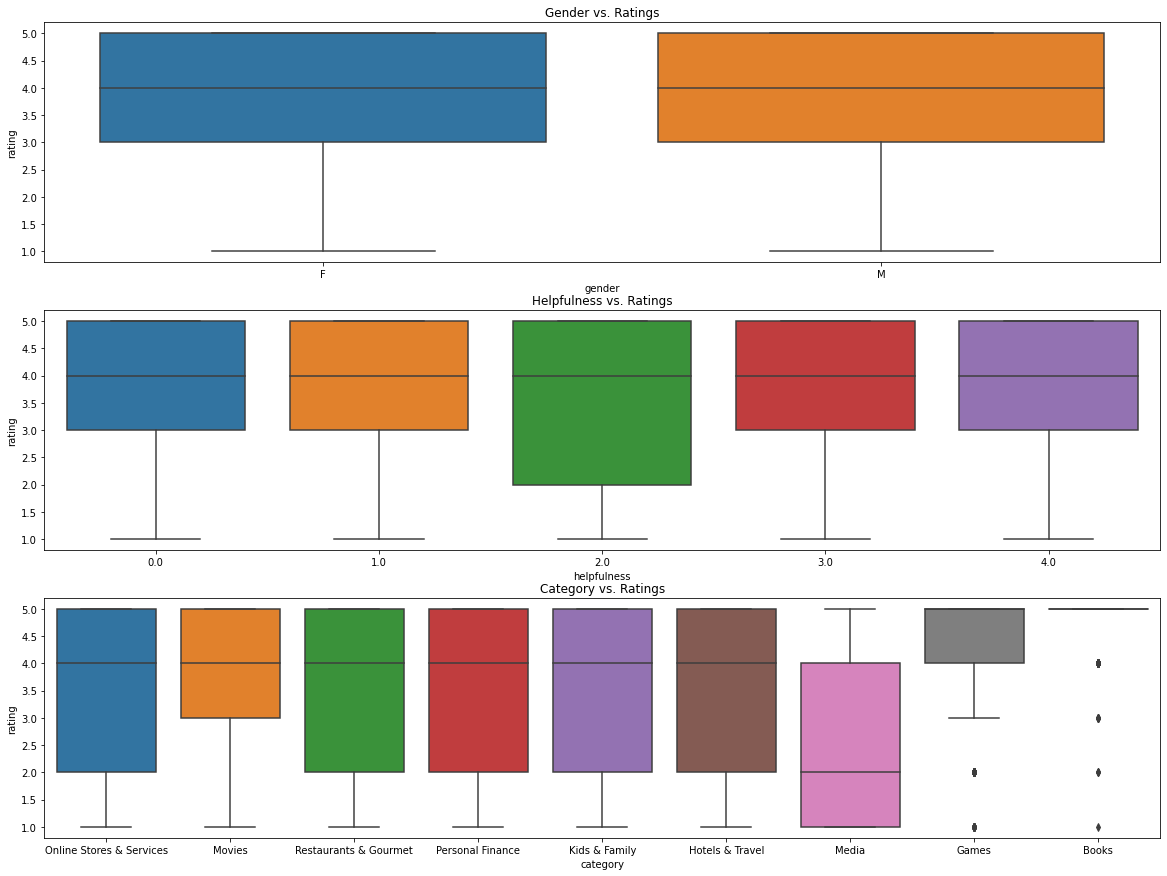

In [14]:
#Q3 Plotting and Analysis

#import below libraries to get various plots
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(nrows = 3, ncols = 1, figsize = (20,15))

#1.Gender vs. Ratings
sns.boxplot(x = 'gender', y = 'rating', data = df_remove, ax = axes[0])
axes[0].set_title('Gender vs. Ratings')

#2.Helpfulness vs. Ratings
sns.boxplot(x = 'helpfulness', y = 'rating', data = df_remove, ax = axes[1])
axes[1].set_title('Helpfulness vs. Ratings')

#3.Category vs. Ratings
sns.boxplot(x = 'category', y = 'rating', data = df_remove, ax = axes[2])
axes[2].set_title('Category vs. Ratings')

plt.show()


## Observations on the above three box plots:

#### 1. Observations on box plot 1 (Gender vs. Ratings)
   * Female and male genders have equal rating = 4.0 (median).
   * Both the genders have maximum rating (=5.0) (upper whisker = upper quartile).
   * Both the genders are consistent in ratings (equal spread of ratings).
      

#### 2. Observations on box plot 2 (Helpfulness vs. Ratings)
   * Clearly all the helpfulness values have same (=4) (median). 
   * The helpfulness value = 2.0 shows left skewness (which means all other users are rating from the values 2 to 5 i.e, more               spreadness of ratings).
   * All the helpfulness values have maximum value (=5.0) (upper whisker=upper quartile).
   * Helpfulness = 2.0 explains the average value of the ratings (between 2 and 5) given by all other users.
      
      
#### 3. Observations on box plot 3 (Category vs. Ratings)
   * The categories namely 'online stores & services', 'Movies', 'Restaurants & Gourmet', 'Personal Finance','Kids & family' and 'Hotels & travel' have same rating as 4 (median). 
   * Among all categories, 'Movies' category has less spread on ratings and more consistent (because of less spread of ratings). 
   * The categories namely 'Online stores & services', 'Movies', 'Restaurants & Gourmet', 'Personal Finance','Kids & family', 'Hotel & travel' and 'Games' have maximum rating (=5.0) (upper whisker = upper quartile).
   * The category 'media' has minimum rating (=1.0) (lower whisker=lower quartile) and median rating is 2.0.
   * The category 'Games' has maximum rating (=5.0) is equal to the upper quartile and no median value. This category have two outliers (of ratings = 1 and 2)
   * The category 'Books' has 4 outliers (of ratings = 1,2,3,4), and have no median and whiskers. But has the maximum rating as 5.0


#### Q4. Detect and remove outliers

We may define outlier users, reviews and items with three rules (if a record meets one of the rules, it is regarded as an outlier):

* reviews of which the helpfulness is no more than 2
* users who rate less than 7 items
* items that receives less than 11 ratings 
 
Please remove the corresponding records in the csv file that involves outlier users, reviews and items. After that, __print the length of the data__.

**A4. Printing length of data aftering removing outliers based on few conditions.**

In [15]:
#Q4. Detect and remove outliers

#select records of reviews of which the helpfulness greater than 2
df_remove_outl = df_remove[df_remove['helpfulness'] > 2]  #Adding the records of reviews with 'helpfulness' greater than 2 to a new dataframe 'df_remove_outl'
print("Length of data aftering removing outliers regarding helpfulness:", len(df_remove_outl))


#select records of users who rate greater than or equal to 7 items
users = df_remove_outl['userId'].value_counts()      #count of individual users
valid_users = users[users >= 7].index.tolist()      
df_remove_outl = df_remove_outl[df_remove_outl['userId'].isin(valid_users)]  #Adding the records of users who rate greater than or equal to 7 to the above dataframe 'df_remove_outl'
print("Length of data aftering removing outliers regarding users:", len(df_remove_outl))


#select records of items that receives greater than or equal to 11 ratings
items = df_remove_outl['item'].value_counts()     #count of individual items
valid_items = items[items >= 11].index.tolist() 
df_remove_outl = df_remove_outl[df_remove_outl['item'].isin(valid_items)]  #Adding the records of items with greater than or equal to 11 to the above dataframe 'df_remove_outl'
print("Length of data aftering removing outliers regarding items:", len(df_remove_outl))


#finding the length of the above dataframe
len_df_remove_outl = len(df_remove_outl)
print('Length of data after removing all the outliers:', len_df_remove_outl)


Length of data aftering removing outliers regarding helpfulness: 13643
Length of data aftering removing outliers regarding users: 2741
Length of data aftering removing outliers regarding items: 2685
Length of data after removing all the outliers: 2685
